In [1]:
%load_ext autoreload
%load_ext tensorboard
%autoreload 2

In [ ]:
# erase tensorlogs
#!rmdir logs /S /Q
#!mkdir logs

# Visualization

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed, TwoByTwoLayout
from data import InstanceLoader

In [35]:
def maskImg(img, threshold):
    mask = img.copy()
    mask[mask <= threshold] = np.nan
    return mask

def f(x, ct, oar, ptv, dose, dose_threshold=0):
    fig, axarr = plt.subplots(1,1, figsize=(15, 8))
    
    if ct is not None and x < ct.shape[-1]:
        axarr.imshow(ct[:,:,x], cmap='viridis', interpolation='None')
    if oar is not None and x < oar.shape[-1]:
        axarr.imshow(maskImg(oar[:,:,x], 0), alpha=0.5, cmap='spring', interpolation='None')
    if ptv is not None and x < ptv.shape[-1]:
        axarr.imshow(maskImg(ptv[:,:,x], 0), alpha=0.8, cmap='bone', interpolation='None')
    if dose is not None and x < dose.shape[-1]:
        axarr.imshow(maskImg(dose[:,:,x], dose_threshold), alpha=0.5, cmap='hot', interpolation='None')

    plt.show()

def f2(x, ct, oar, ptv, dose, ct2, oar2, ptv2, dose2, dose_threshold=0, dose_threshold2=0):
    fig, axarr = plt.subplots(1,2, figsize=(15, 8))
    
    if ct is not None and x < ct.shape[-1]:
        axarr[0].imshow(ct[:,:,x], cmap='viridis', interpolation='None')
    if oar is not None and x < oar.shape[-1]:
        axarr[0].imshow(maskImg(oar[:,:,x], 0), alpha=0.5, cmap='spring', interpolation='None')
    if ptv is not None and x < ptv.shape[-1]:
        axarr[0].imshow(maskImg(ptv[:,:,x], 0), alpha=0.8, cmap='bone', interpolation='None')
    if dose is not None and x < dose.shape[-1]:
        axarr[0].imshow(maskImg(dose[:,:,x], dose_threshold), alpha=0.5, cmap='hot', interpolation='None')

    if ct2 is not None and x < ct2.shape[-1]:
        axarr[1].imshow(ct2[:,:,x], cmap='viridis', interpolation='None')
    if oar2 is not None and x < oar2.shape[-1]:
        axarr[1].imshow(maskImg(oar2[:,:,x], 0), alpha=0.5, cmap='spring', interpolation='None')
    if ptv2 is not None and x < ptv2.shape[-1]:
        axarr[1].imshow(maskImg(ptv2[:,:,x], 0), alpha=0.8, cmap='bone', interpolation='None')
    if dose2 is not None and x < dose2.shape[-1]:
        axarr[1].imshow(maskImg(dose2[:,:,x], dose_threshold2), alpha=0.5, cmap='hot', interpolation='None')
        
    plt.show()

In [33]:
def print_loss(doses, predictions):
    err = tf.keras.losses.MeanAbsoluteError()(doses, predictions).numpy()
    print('MAE', err)

def print_metrics(ptv, pred_dose):
    print('Has any?', pred_dose.any())
    print('Min', pred_dose.min())
    print('Max', pred_dose.max())
    CIndex = metrics.calc_conformity(ptv, pred_dose)
    print('CI', CIndex)
    HIndex = metrics.calc_homogeneity(pred_dose)
    print('HI', HIndex)

def print_dvh(dose, pred_dose):
    dvh_values_truth, dvh_bins_truth = metrics.calc_DVH(dose)
    dvh_values, dvh_bins = metrics.calc_DVH(pred_dose)
    
    plt.plot(dvh_values_truth, dvh_bins_truth, label='truth')
    plt.plot(dvh_values, dvh_bins, label='predicted', linestyle='dashed')
    plt.xlabel("Dose (Gy)")
    plt.ylabel("Volume (%)")
    plt.title("Dose Volume Histogram (DVH)")
    plt.legend()
    plt.show()

def print_3d_layer(obj3d, layer_n):
    layer2d = obj3d[:,:,layer_n]
    for i in range(layer2d.shape[0]):
        for j in range(layer2d.shape[1]):
            print(str(round(layer2d[i][j], 1))[2], end='')
        print("\n", end='')

def inspect_dose(ct, dose, pred_dose):
    biggest = np.max([ct.shape[-1], dose.shape[-1], pred_dose.shape[-1]])
    interact(f2, x=(0, biggest-1), 
        ct=fixed(ct), oar=fixed(None), ptv=fixed(ptv), dose=fixed(dose), dose_threshold=fixed(0),
        ct2=fixed(ct), oar2=fixed(None), ptv2=fixed(ptv), dose2=fixed(pred_dose), dose_threshold2=fixed(0)
    )

## Viz

In [6]:
out_dir = 'C:/Users/joao/Desktop/tese/datasets/Pancreatic/Pancreatic-Preprocessed'
viz_instance_loader = InstanceLoader(out_dir,batch_size=1)
batch = viz_instance_loader.getCase(1)

Instance size: 20
Train size: 16
Test size: 4


In [8]:
viz_instance_loader.cases

['C:/Users/joao/Desktop/tese/datasets/Pancreatic/Pancreatic-Preprocessed\\case0.npz',
 'C:/Users/joao/Desktop/tese/datasets/Pancreatic/Pancreatic-Preprocessed\\case10.npz',
 'C:/Users/joao/Desktop/tese/datasets/Pancreatic/Pancreatic-Preprocessed\\case12.npz',
 'C:/Users/joao/Desktop/tese/datasets/Pancreatic/Pancreatic-Preprocessed\\case14.npz',
 'C:/Users/joao/Desktop/tese/datasets/Pancreatic/Pancreatic-Preprocessed\\case16.npz',
 'C:/Users/joao/Desktop/tese/datasets/Pancreatic/Pancreatic-Preprocessed\\case18.npz',
 'C:/Users/joao/Desktop/tese/datasets/Pancreatic/Pancreatic-Preprocessed\\case2.npz',
 'C:/Users/joao/Desktop/tese/datasets/Pancreatic/Pancreatic-Preprocessed\\case20.npz',
 'C:/Users/joao/Desktop/tese/datasets/Pancreatic/Pancreatic-Preprocessed\\case22.npz',
 'C:/Users/joao/Desktop/tese/datasets/Pancreatic/Pancreatic-Preprocessed\\case24.npz',
 'C:/Users/joao/Desktop/tese/datasets/Pancreatic/Pancreatic-Preprocessed\\case26.npz',
 'C:/Users/joao/Desktop/tese/datasets/Pancrea

In [ ]:
image = batch['CT']
struct = batch['PTV']
oar = batch['OAR']
dose = batch['DOSE']
biggest = np.max([image.shape[-1], struct.shape[-1], oar.shape[-1], dose.shape[-1]])

In [10]:
interact(f, x=(0, biggest-1), ct=fixed(image), oar=fixed(oar), ptv=fixed(struct), dose=fixed(dose), dose_threshold=fixed(0.1))

interactive(children=(IntSlider(value=228, description='x', max=456), Output()), _dom_classes=('widget-interac…

<function __main__.f(x, ct, oar, ptv, dose, dose_threshold=0)>

## Preprocessing

In [4]:
import data

In [15]:
ct = 'C:/Users/joao/Desktop/tese/datasets/Pancreatic/Pancreatic-CT-CBCT-SEG/Pancreas-CT-CB_001/07-06-2012-NA-PANCREAS-59677/201.000000-PANCREAS DI iDose 3-97846'
ct2 = 'C:/Users/joao/Desktop/tese/datasets/Pancreatic/Pancreatic-CT-CBCT-SEG/Pancreas-CT-CB_001/07-06-2012-NA-PANCREAS-59677/56094.000000-Aligned resampled CB02-39781'
dose = 'C:/Users/joao/Desktop/tese/datasets/Pancreatic/Pancreatic-CT-CBCT-SEG/Pancreas-CT-CB_001/07-06-2012-NA-PANCREAS-59677/321.000000-Eclipse Doses-94184'
cts = data.read_dicoms(ct)
cts2 = data.read_dicoms(ct2)
doses = data.read_dicoms(dose)

In [16]:
print(cts.shape, cts2.shape, doses.shape)

(512, 512, 134) (512, 512, 134) (226, 384, 269)


In [ ]:
biggest = np.max([cts.shape[-1], doses.shape[-1]])
interact(f, x=(0, biggest-1), ct=fixed(cts), oar=fixed(None), ptv=fixed(None), dose=fixed(doses), dose_threshold=fixed(0))

In [19]:
filep = np.load('C:/Users/joao/Desktop/tese/datasets/Pancreatic/Pancreatic-Preprocessed2/case0.npz')

In [20]:
image = filep['CT']
dose = filep['DOSE']

In [22]:
biggest = np.max([image.shape[-1], dose.shape[-1]])
interact(f, x=(0, biggest-1), ct=fixed(image), oar=fixed(None), ptv=fixed(None), dose=fixed(dose), dose_threshold=fixed(0.5))

interactive(children=(IntSlider(value=134, description='x', max=268), Output()), _dom_classes=('widget-interac…

<function __main__.f(x, ct, oar, ptv, dose, dose_threshold=0)>

In [11]:
from data import InstancePreprocessor

In [13]:
in_dir = 'C:/Users/joao/Desktop/tese/datasets/Pancreatic/Pancreatic-Normalized'
out_dir = 'C:/Users/joao/Desktop/tese/datasets/Pancreatic/Pancreatic-Preprocessed2'
cts = 'DI'
struct = 'ROI'
struct_name = 'ROI'
dose = 'Doses'

instance = InstancePreprocessor(in_dir,
	cts_filter=cts, structs_filter=struct, struct_name=struct_name, oars_filter=None, doses_filter=dose,
	batch_size=2
)

instance.calculate()
#instance.preprocess(out_dir, data_augmentation=0)

Instance size:  40
Calculating...
Error reading CT case 15
list index out of range
Error reading CT case 21
list index out of range
Error reading CT case 28
list index out of range
Error reading CT case 34
list index out of range
Instance dimension to pad:  [512, 512, 457]


In [ ]:
instance.

# Training

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
from keras.callbacks import ModelCheckpoint, Callback
from keras.models import load_model
import pickle

from data import InstanceLoader
from datateste import NucleiDataGenerator
from model import Unet
import metrics

In [3]:
instance_dir = 'C:/Users/joao/Desktop/tese/datasets/Pancreatic/Pancreatic-Preprocessed'
checkpoint_path = 'C:/Users/joao/Desktop/tese/cnn-dosimetry/models/'
log_dir = 'C:/Users/joao/Desktop/tese/cnn-dosimetry/logs/'

In [4]:
batch_size = 4
split_test = 0.5

instance_loader = InstanceLoader(instance_dir, batch_size=batch_size, split_test=split_test)
instance_shape = instance_loader.shape()
print(instance_shape)

Instance size: 20
Train size: 10
Test size: 10
(128, 128, 32)


In [5]:
instance_loader.preload()

Preloading cases  10
Preloading cases  10


In [17]:
cases, doses = instance_loader.testGen[0]

In [18]:
cases.shape

(4, 128, 128, 32, 1)

In [6]:
import os

In [7]:
image_ids = next(os.walk("C:/Users/joao/Desktop/tese/datasets/Kaggle_stage1_train"))[1]
testing_data_ids = image_ids[:20]
validation_data_ids = image_ids[:50]
training_data_ids = image_ids[:600]
train_gen_teste = NucleiDataGenerator(image_ids = training_data_ids, img_path ="C:/Users/joao/Desktop/tese/datasets/Kaggle_stage1_train", batch_size = 8, image_size = 256)
valid_gen_teste = NucleiDataGenerator(image_ids = validation_data_ids, img_path ="C:/Users/joao/Desktop/tese/datasets/Kaggle_stage1_train", batch_size = 8, image_size = 256)
train_steps_teste = len(training_data_ids)//8
valid_steps_teste = len(validation_data_ids)//8
instance_shape_teste = (256, 256, 3)

## Model

In [18]:
qtd_structures = 1
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.MeanAbsoluteError()
#loss = tf.keras.losses.BinaryCrossentropy()

#unet = Unet(instance_shape_teste)
unet = Unet((instance_shape[0], instance_shape[1], instance_shape[2], qtd_structures))
unet.compile(optimizer=optimizer, loss=loss)

In [36]:
#unet = tf.keras.models.load_model(checkpoint_path+'model')
#unet.compile(optimizer='adam', loss='mae')

In [19]:
unet.summary()

Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                2, 1)]                                                            
                                                                                                  
 Enc_16_Conv_1 (Conv3D)         (None, 128, 128, 32  448         ['input_4[0][0]']                
                                , 16)                                                             
                                                                                                  
 Enc_16_Conv_2 (Conv3D)         (None, 128, 128, 32  6928        ['Enc_16_Conv_1[0][0]']          
                                , 16)                                                          

In [ ]:
tf.keras.utils.plot_model(unet)

In [ ]:
unet.layers[1].variables

### Inspect

In [68]:
batch_index = 0
cases, doses = instance_loader.testGen[batch_index]

In [69]:
predictions = unet.predict(cases)

1/1 [==============================] - 4s 4s/step


In [71]:
case_index = 0
ct = cases[case_index][:,:,:,0]
ptv = cases[case_index][:,:,:,1]
dose = doses[case_index][:,:,:,0]
pred_dose = predictions[case_index][:,:,:,0]

In [72]:
print_loss(doses, predictions)
print_metrics(ptv, pred_dose)

MAE 0.0043133553
Has any? True
Min 0.0
Max 0.047223777
CI 0.010217622209103138
HI 1.92


In [ ]:
print_dvh(dose, pred_dose)

In [ ]:
print_3d_layer(dose, 15)
print('.')
print_3d_layer(pred_dose, 15)

In [ ]:
inspect_dose(ct, dose, pred_dose)

## Training

In [12]:
class WeightCapture(Callback):
  def __init__(self, model):
    super().__init__()
    self.model = model
    self.weights = []
    self.epochs = []

  def on_epoch_end(self, epoch, logs=None):
    self.epochs.append(epoch) # remember the epoch axis
    weight = {}
    for layer in self.model.layers:
      if not layer.weights:
        continue
      name = layer.weights[0].name.split("/")[0]
      weight[name] = layer.weights[0].numpy()
    self.weights.append(weight)

def plotweight(capture_cb):
  fig, ax = plt.subplots(2, 1, sharex=True, constrained_layout=True, figsize=(8, 10))
  ax[0].set_title("Mean weight")
  for key in capture_cb.weights[0]:
      ax[0].plot(capture_cb.epochs, [w[key].mean() for w in capture_cb.weights], label=key)
  ax[0].legend()
  ax[1].set_title("S.D.")
  for key in capture_cb.weights[0]:
      ax[1].plot(capture_cb.epochs, [w[key].std() for w in capture_cb.weights], label=key)
  ax[1].legend()
  plt.show()

In [ ]:
checkpoint_cb = ModelCheckpoint(checkpoint_path+'checkpoints/', monitor='loss', save_best_only=True, save_weights_only=False)

In [20]:
log_now = datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir+log_now, histogram_freq=1)

In [21]:
capture_cb = WeightCapture(unet)
capture_cb.on_epoch_end(-1)

In [22]:
%%time

epochs = 10
#instance_loader.batch(batch_size)

t1 = datetime.now()
results = unet.fit(
    #train_gen_teste,
    instance_loader.trainGen,
    validation_data=instance_loader.testGen,#valid_gen_teste,
    steps_per_epoch=len(instance_loader.trainGen),#train_steps_teste,
    validation_steps=len(instance_loader.testGen),#valid_steps_teste,
    epochs=epochs,#20,
    callbacks=[capture_cb]
)
t2 = datetime.now()
print('TIME:', (t2-t1))

Epoch 1/10
3/3 [==============================] - 82s 25s/step - loss: 0.4917 - val_loss: 0.4824
Epoch 2/10
3/3 [==============================] - 76s 25s/step - loss: 0.4714 - val_loss: 0.3651
Epoch 3/10
3/3 [==============================] - 77s 32s/step - loss: 0.1256 - val_loss: 0.0079
Epoch 4/10
3/3 [==============================] - 77s 25s/step - loss: 0.0075 - val_loss: 0.0079
Epoch 5/10
3/3 [==============================] - 76s 25s/step - loss: 0.0075 - val_loss: 0.0079
Epoch 6/10
3/3 [==============================] - 76s 31s/step - loss: 0.0075 - val_loss: 0.0079
Epoch 7/10
3/3 [==============================] - 75s 24s/step - loss: 0.0075 - val_loss: 0.0079
Epoch 8/10
3/3 [==============================] - 77s 25s/step - loss: 0.0075 - val_loss: 0.0079
Epoch 9/10
3/3 [==============================] - 80s 27s/step - loss: 0.0075 - val_loss: 0.0079
Epoch 10/10
3/3 [==============================] - 86s 27s/step - loss: 0.0075 - val_loss: 0.0079
TIME: 0:13:03.660545
CPU time

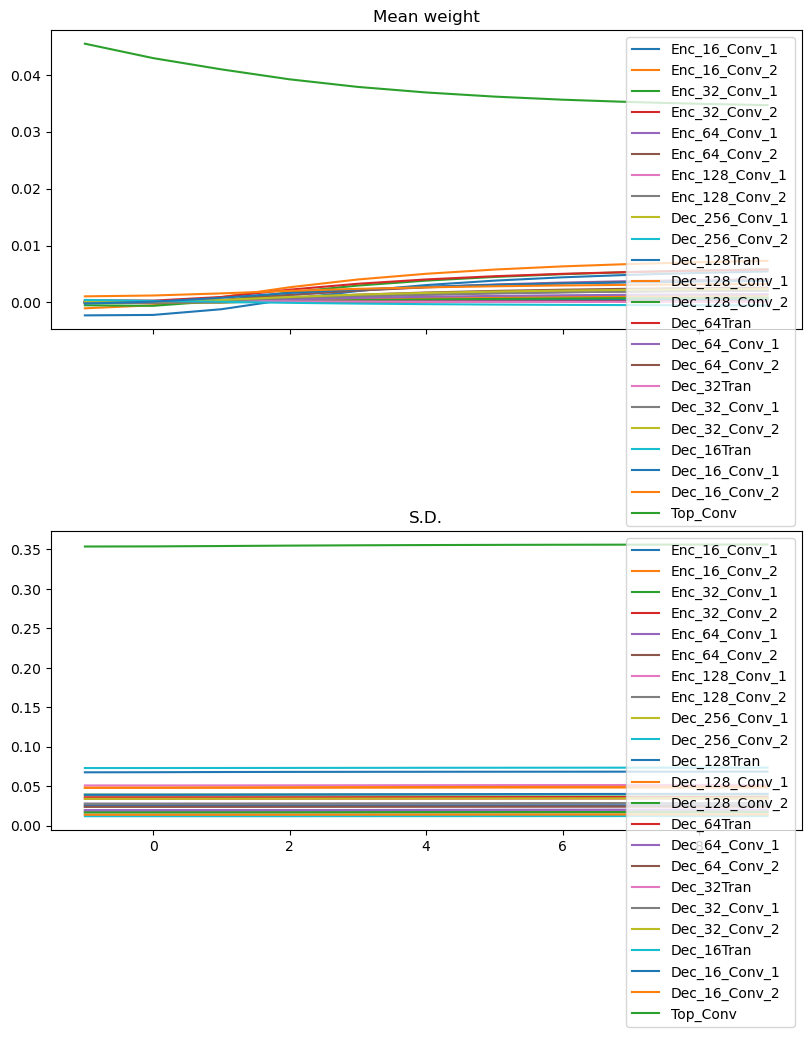

In [23]:
plotweight(capture_cb)

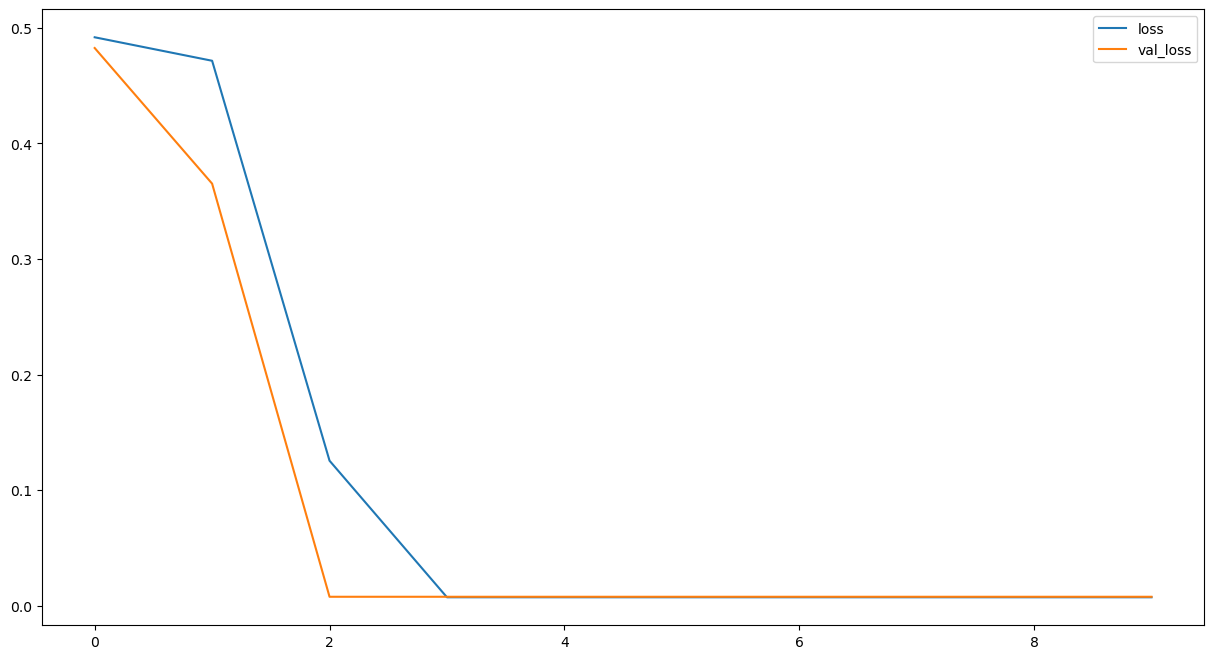

In [24]:
plt.figure(figsize=(15,8))
plt.plot(results.history['loss'], label='loss')
plt.plot(results.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
#unet.save(checkpoint_path+'model')

### Results

In [26]:
batch_index = 0
cases, doses = instance_loader.testGen[batch_index]

In [27]:
predictions = unet.predict(cases)

1/1 [==============================] - 3s 3s/step


In [31]:
case_index = 0
ct = cases[case_index][:,:,:,0]
#ptv = cases[case_index][:,:,:,1]
dose = doses[case_index][:,:,:,0]
pred_dose = predictions[case_index][:,:,:,0]

In [72]:
print_loss(doses, predictions)
print_metrics(ptv, pred_dose)

MAE 0.0043133553
Has any? True
Min 0.0
Max 0.047223777
CI 0.010217622209103138
HI 1.92


C:\Users\joao\Desktop\tese\cnn-dosimetry\metrics.py:34: RuntimeWarning: invalid value encountered in divide
  values = values / values.max()


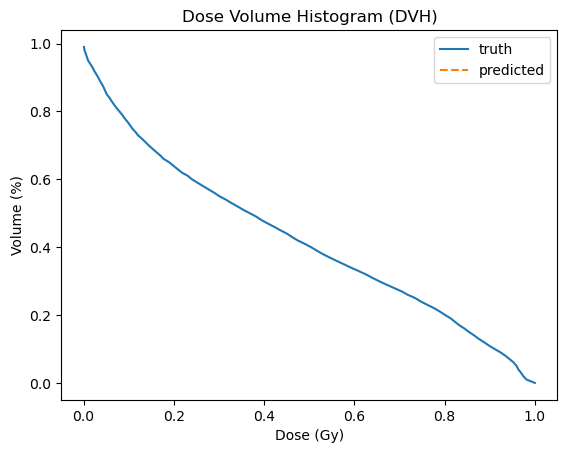

In [36]:
print_dvh(dose, pred_dose)

In [37]:
print_3d_layer(dose, 15)
print('.')
print_3d_layer(pred_dose, 15)

00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [ ]:
inspect_dose(ct, dose, pred_dose)